In [1]:
!pip install wordcloud

In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

column_names = ' '.join(df.columns)

# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(column_names)

# Display the word cloud
plt.figure(figsize=(8, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'df' is not defined

# Problem Statement

In this dataset, we have collected information related to income evaluation across various countries. Our objective is to leverage the available features to construct a predictive model capable of discerning whether an individual's income surpasses a predefined threshold, specifically exceeding $50,000. By developing this model, we aim to identify and understand the key factors that contribute to higher incomes. This predictive analysis holds the potential to uncover insights into the socio-economic dynamics and employment characteristics that correlate with elevated income levels. Ultimately, the knowledge gained from this model can provide valuable information for policymakers, researchers, and individuals seeking to comprehend the determinants of financial success across diverse geographic and demographic contexts.

# About The Dataset

In [ ]:
Age: The age of an employee
Work-class: Profession category 
Final_census : Census(population of the country)
Education: Type of last (max) Education
Education_num: Years spend on studies
Marital Status: Person married or not
Occupation: Person 
Relationship: Bounded by any relation or dependent 
Race: which ethnicity belongs to the employee 
Gender: gender of the employee

# Import all the libraries

In [8]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from imblearn.over_sampling import RandomOverSampler,SMOTE,BorderlineSMOTE,ADASYN
from imblearn.under_sampling import RandomUnderSampler,NearMiss
from imblearn.combine import SMOTEENN
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix,classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix


# Reading and Cleaning the data

In [9]:
data = pd.read_csv('Data_inc.csv')

In [10]:
df=data.copy()

In [11]:
df.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN


In [12]:
df.columns

Index(['Age', 'Profession Class', 'Final_census', ' Education',
       ' Education-num', ' marital-status', ' occupation', ' relationship',
       ' race', 'Gender', ' capital-gain', ' capital-loss', ' hours-per-week',
       ' country', ' income', 'Unnamed: 15'],
      dtype='object')

In [13]:
# Remove spaces in column names using str.replace
df.columns = df.columns.str.replace(' ', '')
# Now all spaces in the column names are removed
df = df.applymap(lambda x: x.replace(' ', '') if isinstance(x, str) else x)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              32561 non-null  int64  
 1   ProfessionClass  32561 non-null  object 
 2   Final_census     32561 non-null  int64  
 3   Education        32561 non-null  object 
 4   Education-num    32561 non-null  int64  
 5   marital-status   32561 non-null  object 
 6   occupation       32561 non-null  object 
 7   relationship     32561 non-null  object 
 8   race             32561 non-null  object 
 9   Gender           32561 non-null  object 
 10  capital-gain     32561 non-null  int64  
 11  capital-loss     32561 non-null  int64  
 12  hours-per-week   32561 non-null  int64  
 13  country          32561 non-null  object 
 14  income           32561 non-null  object 
 15  Unnamed:15       2 non-null      float64
dtypes: float64(1), int64(6), object(9)
memory usage: 4.0+ MB


In [15]:
df.isnull().sum()

Age                    0
ProfessionClass        0
Final_census           0
Education              0
Education-num          0
marital-status         0
occupation             0
relationship           0
race                   0
Gender                 0
capital-gain           0
capital-loss           0
hours-per-week         0
country                0
income                 0
Unnamed:15         32559
dtype: int64

##### Observation:
There are not null values exept for the 'Unnamed: 15' column, where
almost all the values are null.
Therefore we will have to drop the 'Unnamed: 15'.

In [16]:
df=df.drop('Unnamed:15', axis=1)

##### Let's check our dataset for any symbols using regular expressions


In [17]:
# Iterate through each column
for column in df.columns:
    # Concatenate all values in the column to form a single string
    combined_text = ''.join(df[column].astype(str))

    # Extract unique symbols using regular expression
    unique_symbols = set(re.findall(r'[^\w\s]', combined_text))

    if unique_symbols:
        print(f"The column '{column}' contains the following symbols: {', '.join(unique_symbols)}")

The column 'ProfessionClass' contains the following symbols: ?, -
The column 'Education' contains the following symbols: -
The column 'marital-status' contains the following symbols: -
The column 'occupation' contains the following symbols: ?, -
The column 'relationship' contains the following symbols: -
The column 'race' contains the following symbols: -
The column 'country' contains the following symbols: ?, ), (, -, &
The column 'income' contains the following symbols: <, >, =


##### There are question mark symbols in the columns 'Profession Class', 'occupation', 'country', so we need to replace those values with np.nan.
 

In [18]:
columns_to_replace=['ProfessionClass', 'occupation', 'country']
for column in columns_to_replace:
    df[column]=df[column].str.strip()
    df.loc[df[column] == '?',column] = np.nan
    

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   ProfessionClass  30725 non-null  object
 2   Final_census     32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Education-num    32561 non-null  int64 
 5   marital-status   32561 non-null  object
 6   occupation       30718 non-null  object
 7   relationship     32561 non-null  object
 8   race             32561 non-null  object
 9   Gender           32561 non-null  object
 10  capital-gain     32561 non-null  int64 
 11  capital-loss     32561 non-null  int64 
 12  hours-per-week   32561 non-null  int64 
 13  country          31978 non-null  object
 14  income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [20]:
df.isnull().sum()

Age                   0
ProfessionClass    1836
Final_census          0
Education             0
Education-num         0
marital-status        0
occupation         1843
relationship          0
race                  0
Gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
country             583
income                0
dtype: int64

##### As per categorical values, we will replace null values using the  mode imputation approach

In [21]:
# Select columns
columns_to_fill = ['ProfessionClass', 'occupation', 'country']

In [22]:
for column in columns_to_fill:
    df[column].fillna(df[column].mode()[0],inplace=True)
    

In [23]:
# check null values
df.isnull().sum()

Age                0
ProfessionClass    0
Final_census       0
Education          0
Education-num      0
marital-status     0
occupation         0
relationship       0
race               0
Gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
country            0
income             0
dtype: int64

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
Final_census,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
Education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


##### The minimum and maximum age range from 17 to 90, with an average age of 37. 
##### The minimum and maximum years spent on education range from 1 to 16 years, with an average of 10 years.
##### The minimum and maximum capital gain range from 0 to 99999, with an average of 0; there may be some errors in the data.
##### The minimum and maximum capital loss range from 0 to 4356, with an average of 0; there may be some errors in the data.
##### The minimum and maximum working hours per week range from 1 to 99 hours, with an average of 40.

## Feature Engineering

In [25]:
# Education
df.Education = df.Education.replace(['Preschool','1st-4th','5th-6th','7th-8th','9th','10th','11th','12th'],'school')
df.Education = df.Education.replace(['Assoc-voc','Assoc-acdm','Prof-school','Some-college'],'higher')
df.Education = df.Education.replace('HS-grad','high school')

In [26]:
# marital status
df['marital-status']=df['marital-status'].replace(['Married-civ-spouse','Married-AF-spouse'],'married')
df['marital-status']=df['marital-status'].replace('Never-married','not-married')
df['marital-status']=df['marital-status'].replace(['Divorced','Separated','Married-spouse-absent','Widowed'],'others')


In [27]:
df['Education'].unique()

array(['Bachelors', 'high school', 'school', 'Masters', 'higher',
       'Doctorate'], dtype=object)

# EDA

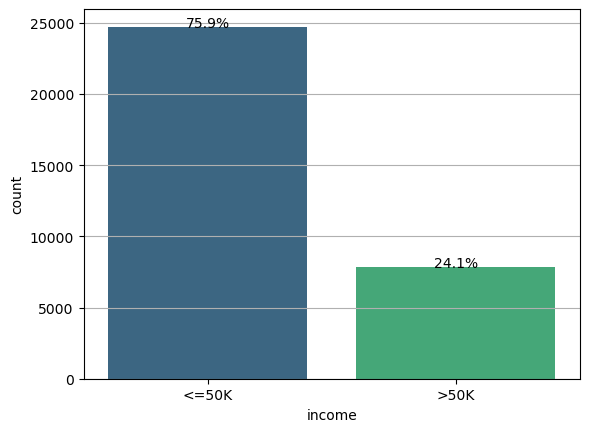

In [28]:
ax = sns.countplot(x='income',data=df, palette='viridis')
ax.yaxis.grid(True)
# Add percentage labels
total = len(df['income'])
for i in ax.patches:
    percentage = '{:.1f}%'.format(100 * i.get_height() / total)
    x = i.get_x() + i.get_width() / 2
    y = i.get_height() + 0.02  # Adjust the vertical position of the percentage label
    ax.annotate(percentage, (x, y), ha='center')

# Show the plot
plt.show()


##### Observation:
The distribution of the target variable is unbalanced; 75.9% have income less than 50K, and 24.1% have income more than 50K.


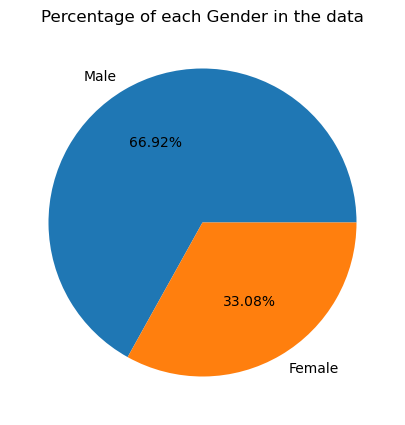

In [29]:
plt.figure(figsize=(8,5))
plt.pie(x=df["Gender"].value_counts(),labels=df["Gender"].value_counts().index,autopct='%0.2f%%',data=df)
plt.title('Percentage of each Gender in the data')
plt.show()

##### Observation:
Our dataset contains 66.92% males and 33.08% females. This can be logically explained by the fact that women often dedicate more time to family-related responsibilities

/Users/renaabbasova/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


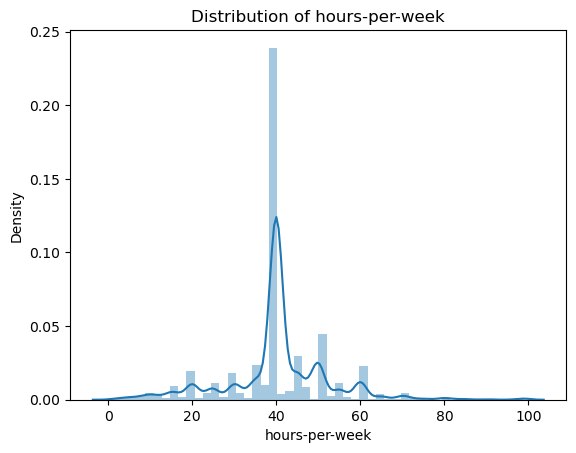

In [30]:
sns.distplot(df['hours-per-week'])
# Set the title and labels
plt.title('Distribution of hours-per-week')
plt.show()

##### Observation:
Most individuals typically work 40 hours per week. However, in our dataset, we observe that there are workers who dedicate both more and less than 40 hours per week. Let's explore which professional classes tend to dedicate more than 40 hours per week.


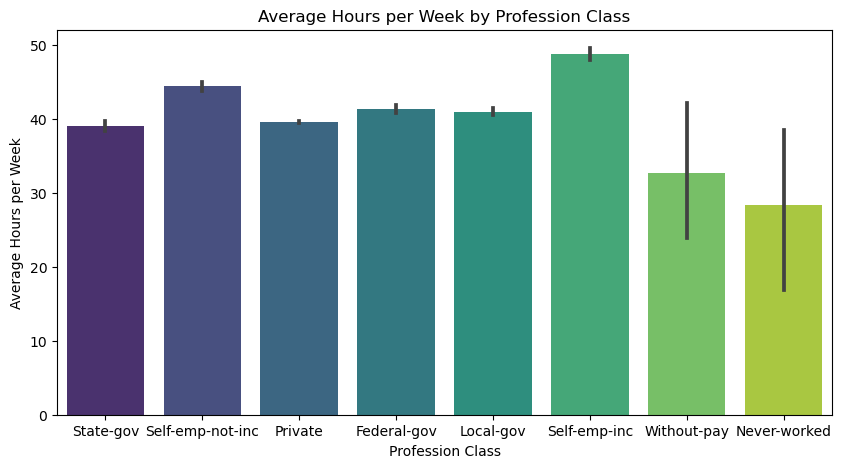

In [31]:
plt.figure(figsize=(10,5))
# Create a bar plot
sns.barplot(x='ProfessionClass', y='hours-per-week', data=df, palette='viridis')

# Customize the plot
plt.title('Average Hours per Week by Profession Class')
plt.xlabel('Profession Class')
plt.ylabel('Average Hours per Week')

# Show the plot
plt.show()


##### Observation:
As per our dataset, self-employed individuals generally work more than 40 hours per week,
while those categorized as 'Never Worked' likely have no employment history. Individuals without pay are likely not engaged in paid employment or do not receive any income.

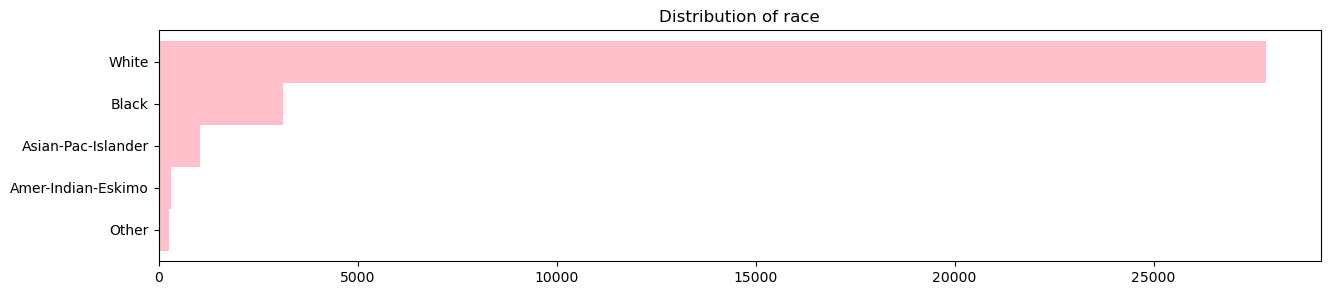

In [32]:
freq = df['race']. value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(15, 3), width=1, color = ["pink"])
plt.title('Distribution of race')
plt.show()

##### Observation:
The distribution of white people is likely larger.

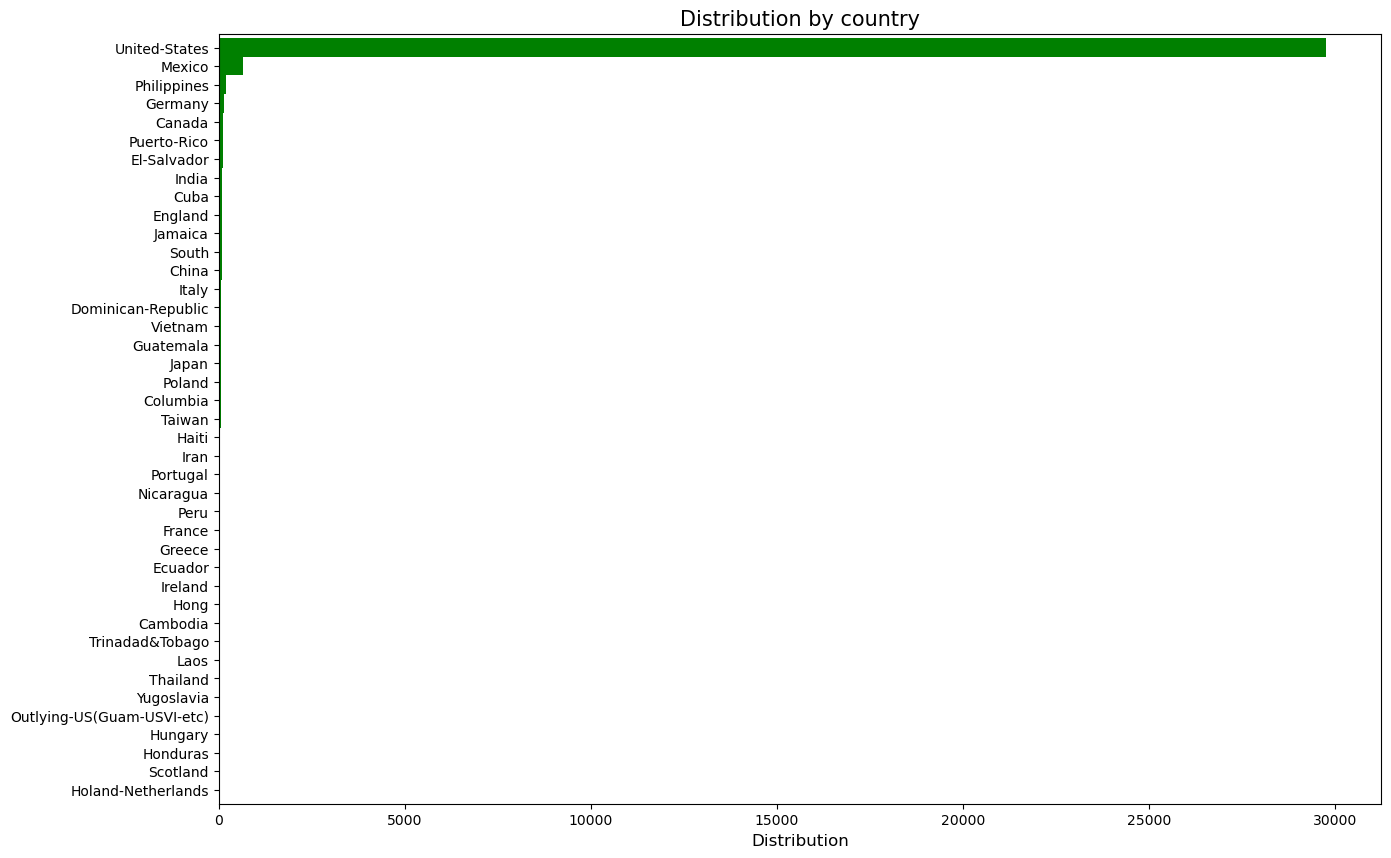

In [33]:
feq=df['country'].value_counts().sort_values(ascending=True)
feq.plot.barh(figsize=(15, 10), color='g', width=1)
plt.title("Distribution by country", fontsize=15)
plt.xlabel('Distribution', fontsize=12)
plt.show()

##### Observation:
The large number of white people can be explained by the distribution of the country. I assume the survey was collected in the US.

/Users/renaabbasova/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


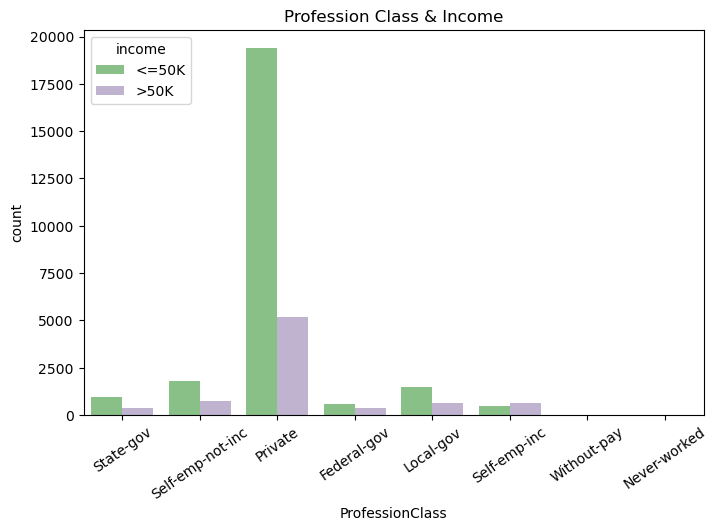

In [34]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=35)
sns.countplot(df['ProfessionClass'], hue = df['income'],palette='Accent')
plt.title('Profession Class & Income')
plt.show()

##### Observation:
When exploring the data on 'Profession Class' versus income, we can observe that individuals working in the private sector, which includes privately-owned businesses or organizations, tend to earn more than 50K.


##### Let's explore the Private Class below and plot the graph.

In [35]:
# Profession Class in Private sector with income more 50K
private_sector_data = df[df['ProfessionClass'] == 'Private']
private_sector_high_income = private_sector_data[private_sector_data['income'] == '>50K']

# Display the first few rows of the filtered data
#print(private_sector_high_income.head())


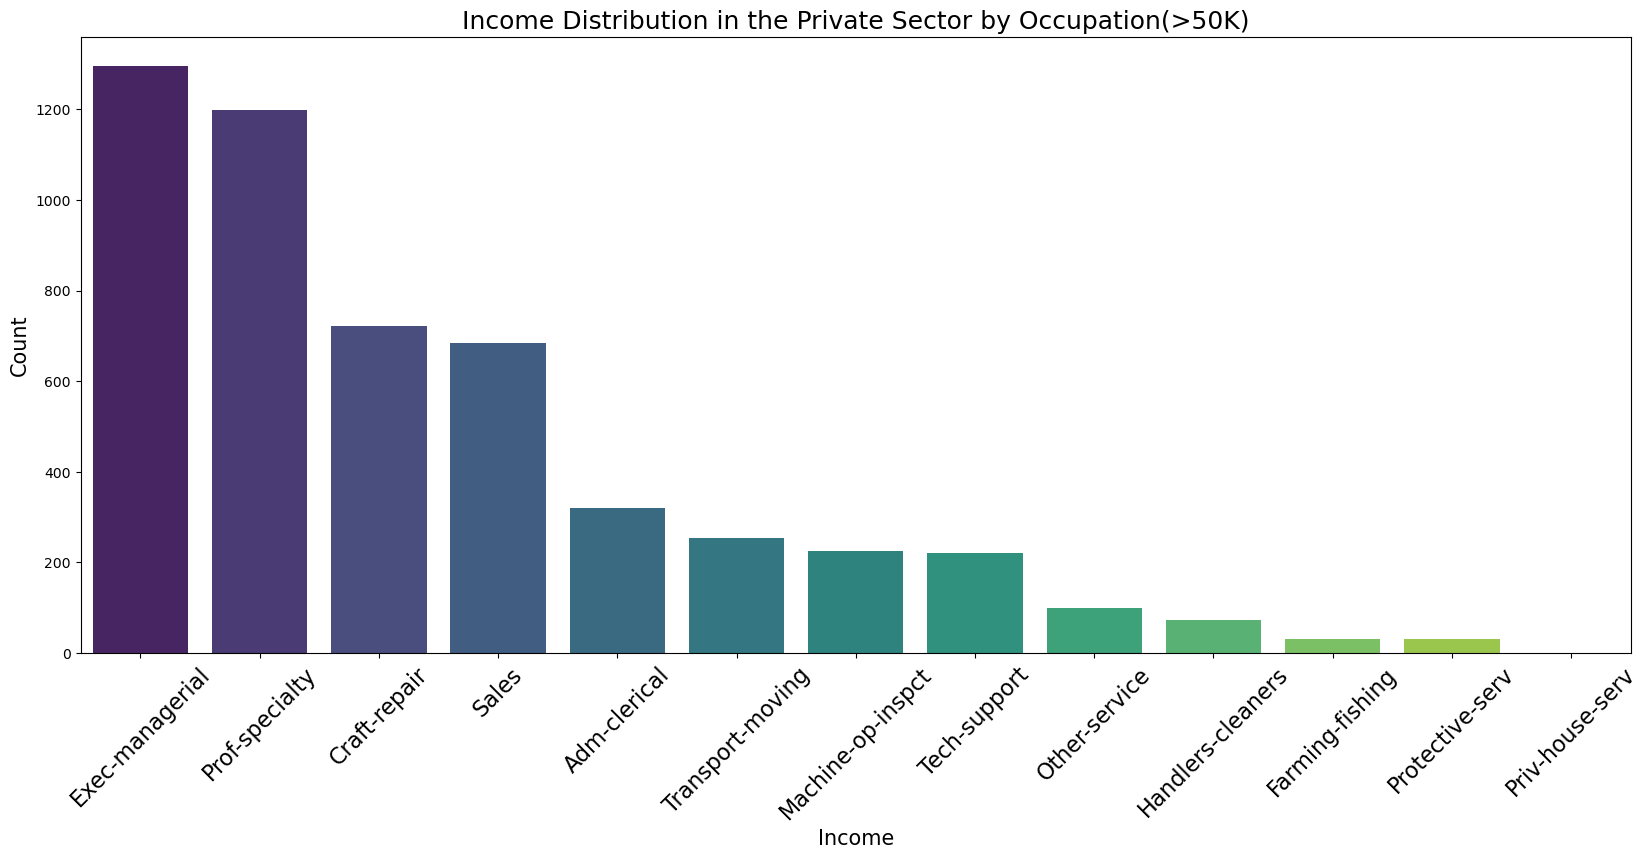

In [36]:
# Get the counts for each occupation in descending order
occupation_counts = private_sector_high_income['occupation'].value_counts().sort_values(ascending=False)

# Create a bar plot of occupations in the private sector with incomes grater than 50K.
plt.figure(figsize=(20, 8))
sns.countplot(x='occupation', data=private_sector_high_income,order=occupation_counts.index, palette='viridis')
plt.title('Income Distribution in the Private Sector by Occupation(>50K)',fontsize=18)
plt.xlabel('Income',fontsize=15)
plt.ylabel('Count',fontsize=15)


# Show the plot
plt.xticks(rotation=45,fontsize=16) 
plt.show()


##### Observation:
In terms of occupations in Private sector with income greater than 50K, Exec-managerial takes the lead, followed by Prof-specialty, Craft-repair, and Sales.

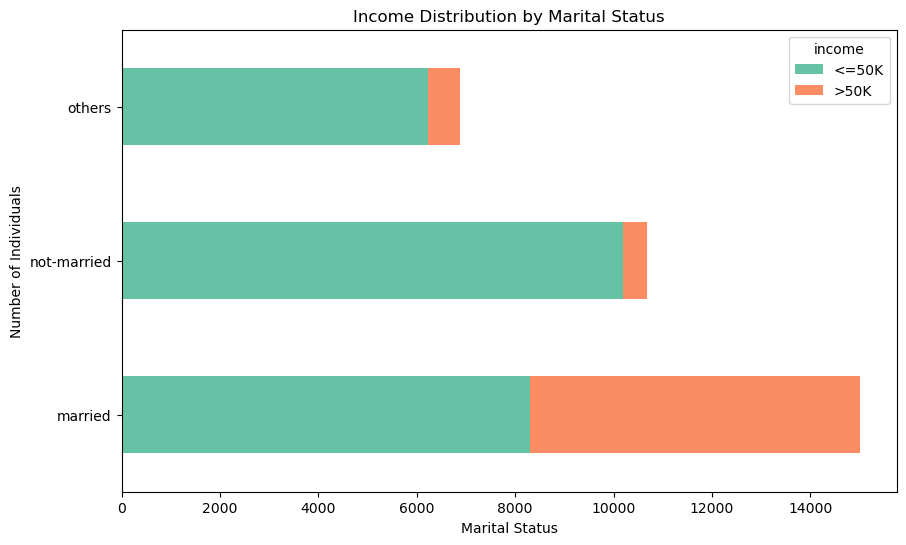

In [37]:
df1 = pd.crosstab(df['marital-status'], df['income'])
colors = sns.color_palette("Set2")
# Plotting a stacked bar chart
ax = df1.plot(kind='barh', stacked=True, figsize=(10,6 ),color=colors)
ax.set_ylabel('Number of Individuals')
ax.set_xlabel('Marital Status')
ax.set_title('Income Distribution by Marital Status')

plt.show()


##### Observation:
The distribution of 'Married' individuals is larger in our dataset, and married individuals also tend to earn more than 50K.
The correlation between higher income and being married in a dataset might be influenced by various factors: Joint Income, Stability and Commitment, Age and Experience, Family Responsibilities.

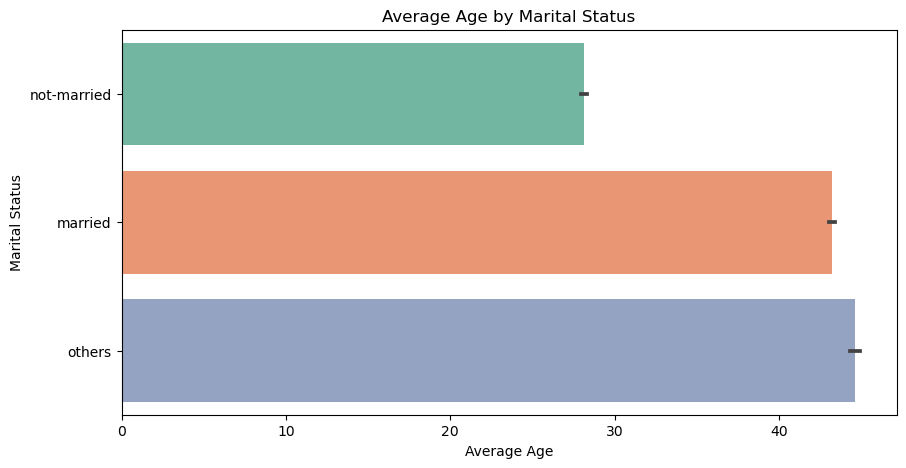

In [38]:
plt.figure(figsize=(10, 5))
# Create a horizontal bar plot
sns.barplot(x='Age', y='marital-status', data=df, palette='Set2')

# Customize the plot
plt.title('Average Age by Marital Status')
plt.xlabel('Average Age')
plt.ylabel('Marital Status')

# Show the plot
plt.show()


##### Observation:
This plot explains marital status by age. Not-married people are still young individuals, less than 30 years old. 

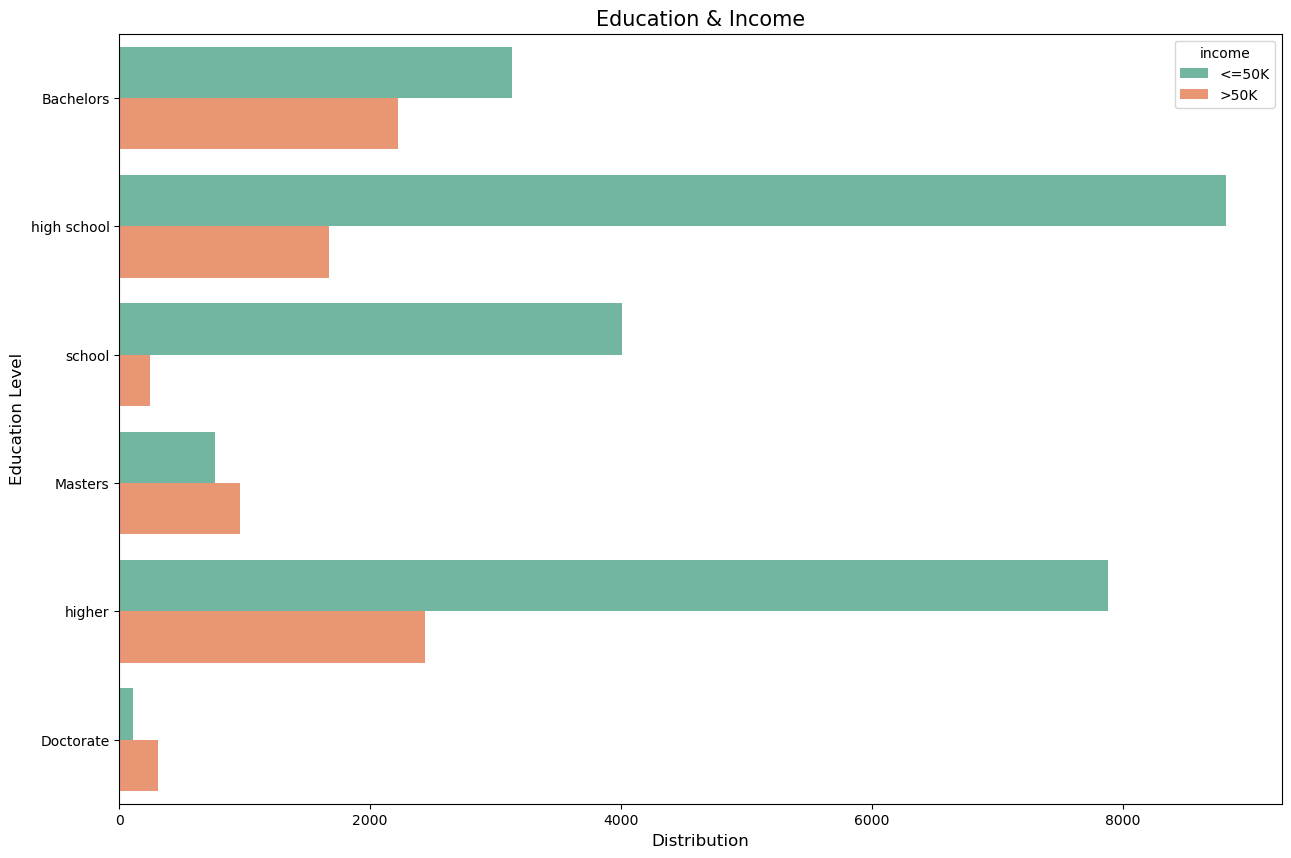

In [39]:
# Set the color palette
sns.set_palette("Set2")

# Create the plot
plt.figure(figsize=(15, 10))
sns.countplot(y='Education', hue='income', data=df)
plt.title("Education & Income", fontsize=15)
plt.xlabel('Distribution', fontsize=12)
plt.ylabel('Education Level', fontsize=12)
plt.show()


##### Observation:
Masters, Doctorate, Bachelors have a higher possibility of having income greater than 50K. Very few individuals with a Doctorate have incomes less than 50K. This tells us that education significantly affects the percentage of income.

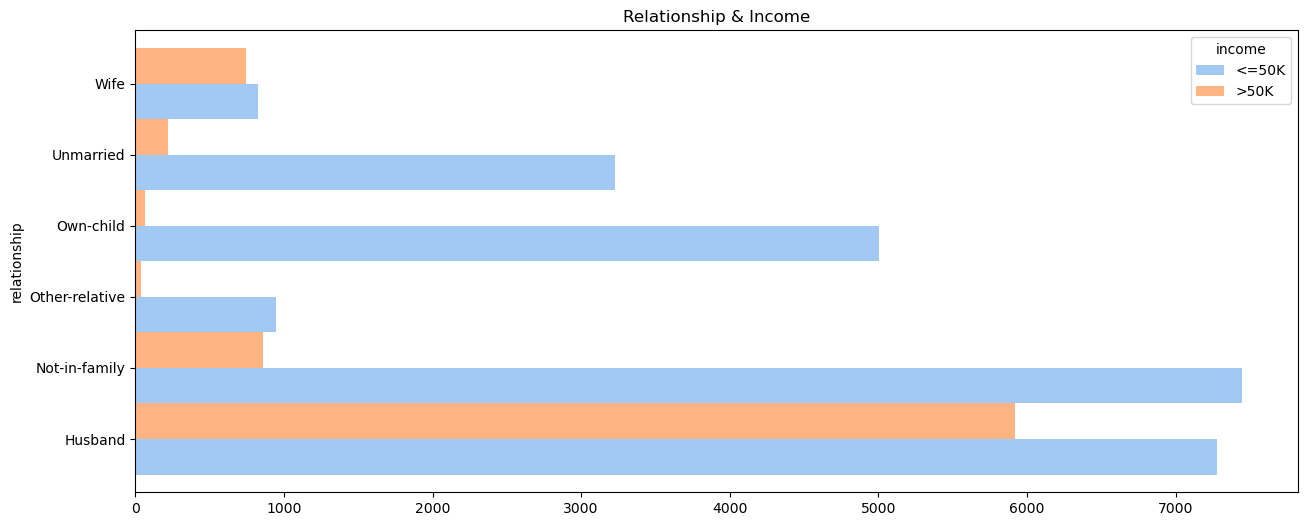

In [40]:
freq = df.groupby(['relationship', 'income']).size().unstack().fillna(0)
custom_palette = sns.color_palette('pastel')
freq.plot.barh(figsize=(15, 6), width=1, color=custom_palette)
plt.title('Relationship & Income')
plt.show()

##### Observation:
On this plot, we can see again that married couples have a higher probability of earning greater than 50K.

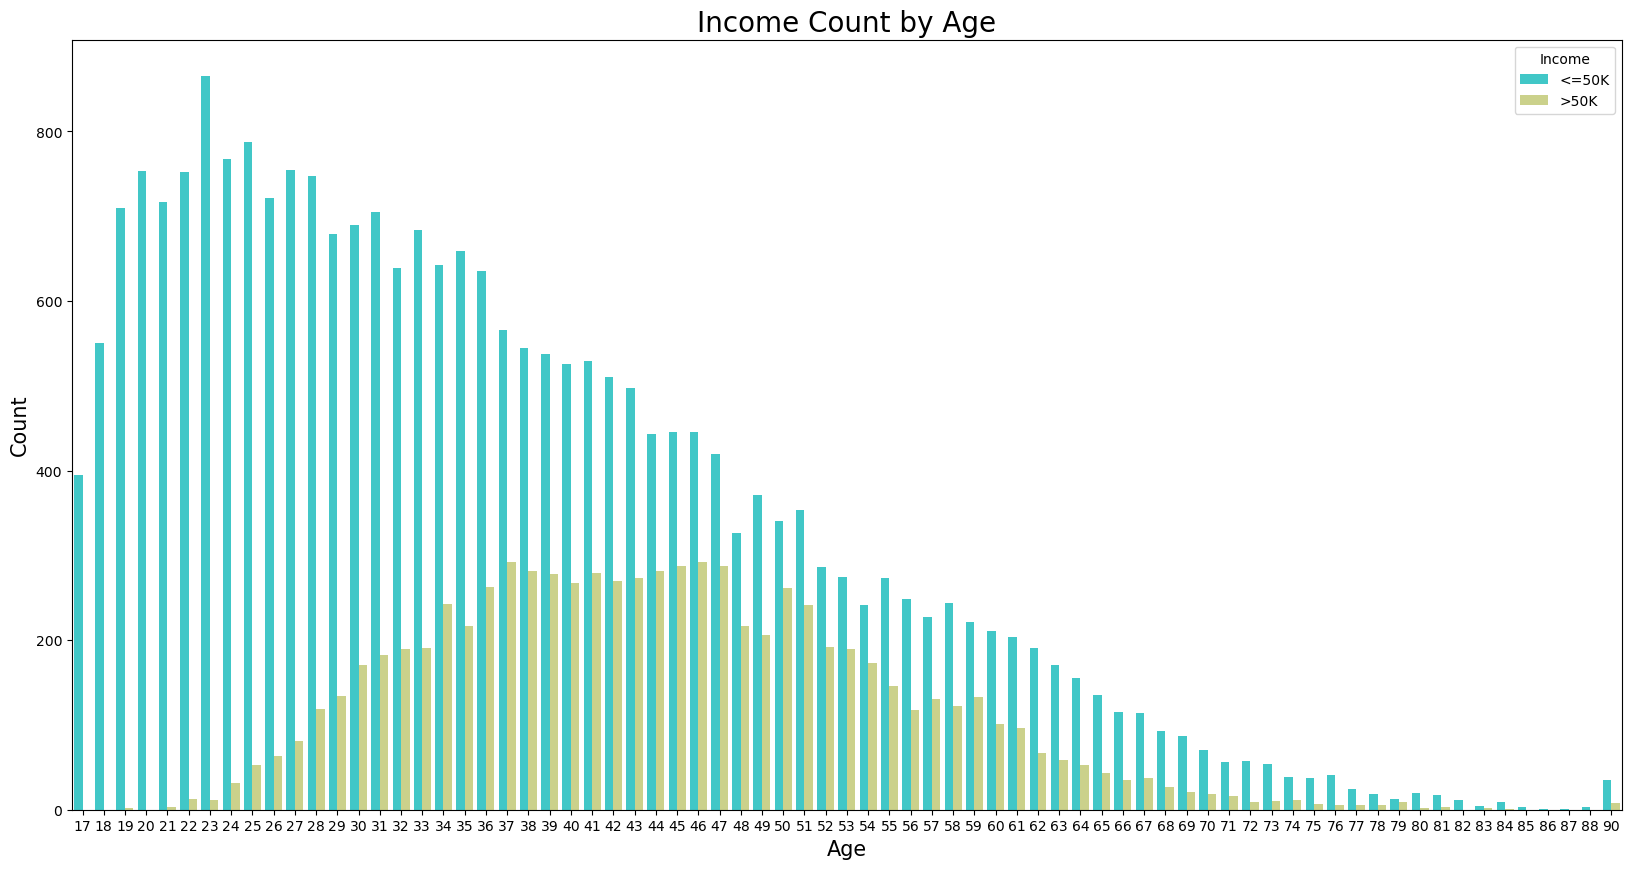

In [41]:
# Create a count plot
plt.figure(figsize=(20,10))
sns.countplot(x="Age", hue="income", data=df, palette="rainbow")

# Customize the plot
plt.title("Income Count by Age",fontsize=20)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.legend(title="Income", loc="upper right")

##### Observation:
Distribution of age for income greater than 50K follows almost a normal distribution, while for less than 50K, it is skewed to the right. Ages range from 37 to 47 for individuals with higher income.

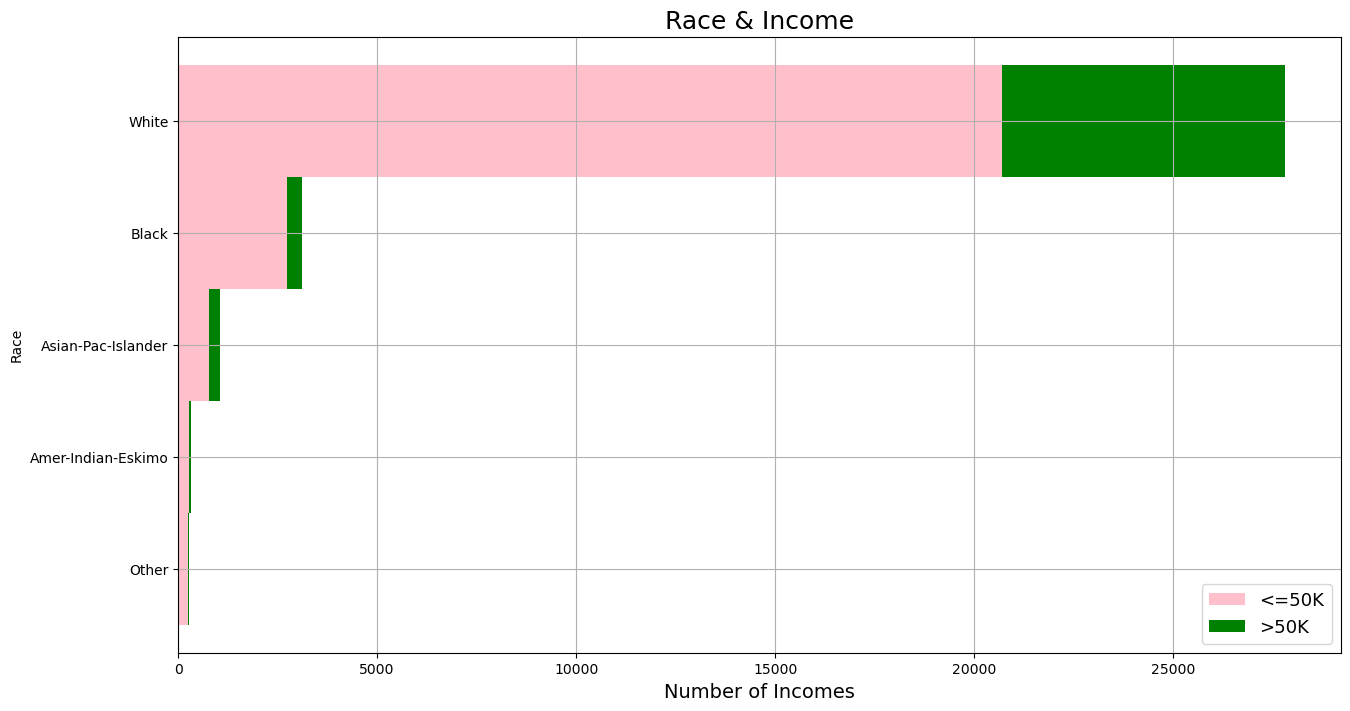

In [42]:
prop = df.groupby(['race','income']).income.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=100]
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["pink","g"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Race & Income', fontsize=18)
plt.xlabel('Number of Incomes', fontsize=14)
plt.ylabel("Race")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

/Users/renaabbasova/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='race', ylabel='count'>

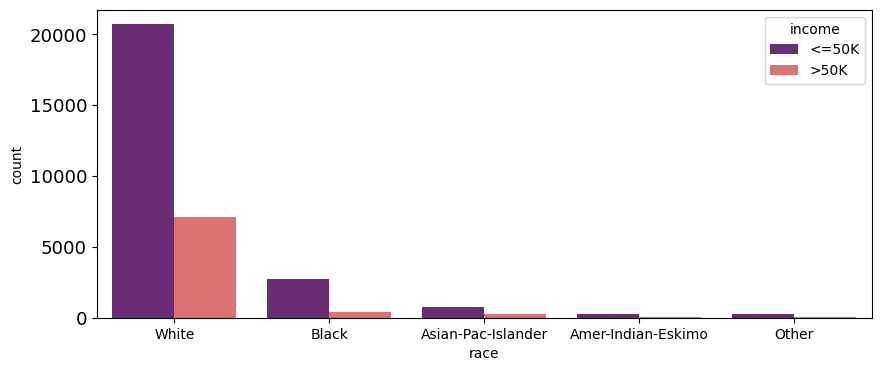

In [43]:
plt.figure(figsize=(10,4))
sns.countplot(df['race'],hue='income',data=df,palette='magma')

##### Observation:
White individuals exhibit higher income in this plot. As we know, this survey was conducted in the US, where a higher percentage of the population is white.

<AxesSubplot:xlabel='Education-num', ylabel='Count'>

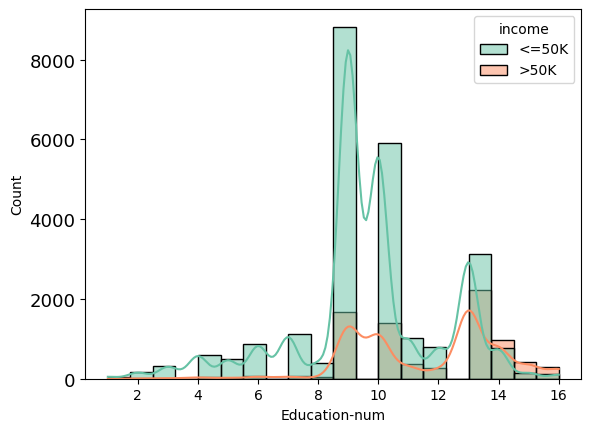

In [44]:
sns.histplot(data=df, x='Education-num', bins = 20, kde = True, hue = 'income')

##### Observation:
Between 12 and 14 years of education, income is higher. This means that individuals with higher education levels and more training tend to have higher incomes

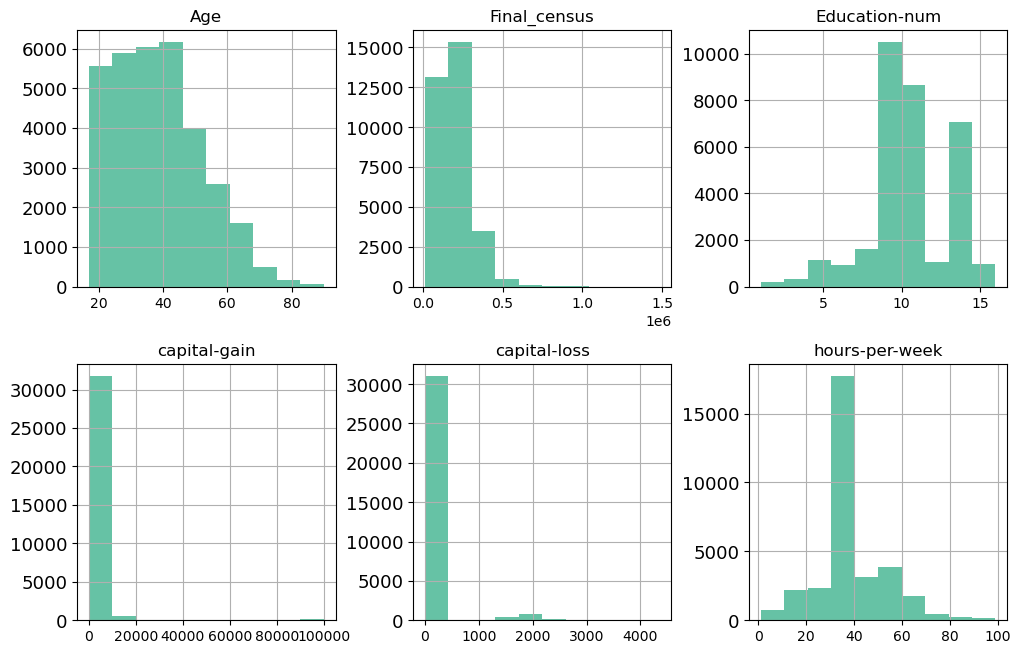

In [45]:
df.hist(figsize=(12,12),layout=(3,3),sharex=False);

##### Conclusion Analysis:

It appears to be a US-based survey, which is why a majority of participants belong to the white and black ethnicities, although other ethnicities are also represented. The dataset exhibits bias towards individuals earning <=50K USD. Additionally, there is bias in the data concerning the ratio between those earning more than 50K and those earning less than 50K, except for the Asian-Pac-Islander group. The dataset also contains information about more males than females.

The data in Capital-Gain and Capital-loss are vastly spread out with really high variance.This either means the data contains a large portion of the information, or, it has a lot of extreme values. In our case, these contain extreme values and these are 0 (zero) in a lot of rows.

Upon analysis, several interesting patterns emerged. Individuals pursuing higher education, such as bachelors, masters, doctorate, or specializations, tend to have higher incomes. Conversely, those with only a high school education tend to earn less than 50K, possibly due to a lack of skills, education, exposure, or other factors.

Married individuals tend to earn more than 50K, and this correlation between higher income and being married might be influenced by joint income, stability, and commitment.

People generally work 40-hour weeks, but it is not uncommon to see individuals working significantly more or less. The age range of working individuals spans from 17 to over 90. Most people earning more than 50K working 40 hours or more per week.
Self employed people may work more or less hours than employees. Profession also determines the hours of work per week.

In [46]:
#df.corr()

In [47]:
#sns.heatmap(df.corr(),annot=True)

### Check numerical data for outliers

## BoxPlot

<AxesSubplot:>

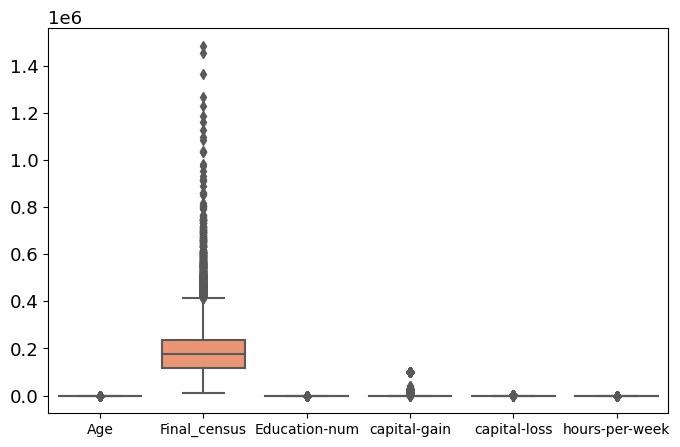

In [48]:
plt.figure(figsize = (8,5))
sns.boxplot(data = df)

### Capping approach - adjustment of outlier -- No delete

In [49]:
df2 = df.copy()

In [50]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
Upper_fence = (Q3+1.5*IQR)
Lower_fence = (Q1-1.5*IQR)
print('upper_fence\n', Upper_fence)
print('Lower_fence\n', Lower_fence)

upper_fence
 Age                   78.0
Final_census      415887.0
Education-num         16.5
capital-gain           0.0
capital-loss           0.0
hours-per-week        52.5
dtype: float64
Lower_fence
 Age                  -2.0
Final_census     -61009.0
Education-num         4.5
capital-gain          0.0
capital-loss          0.0
hours-per-week       32.5
dtype: float64


In [51]:
num_cols=['Age','Final_census','Education-num','capital-gain','capital-loss','hours-per-week']

In [52]:
df2[num_cols]=np.where(df2[num_cols]>Upper_fence,Upper_fence,np.where(df2[num_cols]<Lower_fence,Lower_fence,df2[num_cols]))


<AxesSubplot:>

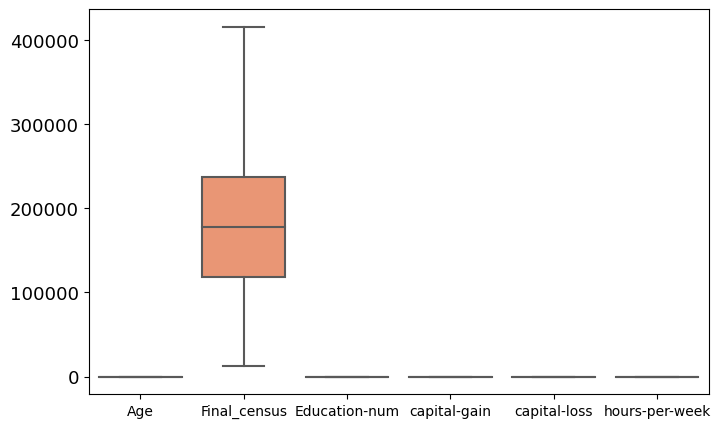

In [53]:
plt.figure(figsize = (8,5))
sns.boxplot(data = df2)

In [54]:
df2.describe(include=object)

,ProfessionClass,Education,marital-status,occupation,relationship,race,Gender,country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,6,3,14,6,5,2,41,2
top,Private,high school,married,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,10501,14999,5983,13193,27816,21790,29753,24720


### Label encoding--transformation of data categorical to_numeric format

In [55]:
col_cat = ['ProfessionClass','Education','marital-status','occupation','relationship','race','Gender','country']


In [56]:
label=preprocessing.LabelEncoder()

In [57]:
for col in col_cat:
    
    df2[col]=label.fit_transform(df2[col])

In [58]:
# Removing all the spaces
df2 = df2.apply(lambda x: x.str.strip() if x.dtype == "object" else x)


In [59]:
mapping = {'<=50K': 0, '>50K': 1}
df2['income'] = df2['income'].map(mapping)


In [60]:
df2.head()

,Age,ProfessionClass,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
0,39.0,6,77516.0,0,13.0,1,0,1,4,1,0.0,0.0,40.0,38,0
1,50.0,5,83311.0,0,13.0,0,3,0,4,1,0.0,0.0,32.5,38,0
2,38.0,3,215646.0,3,9.0,2,5,1,4,1,0.0,0.0,40.0,38,0
3,53.0,3,234721.0,5,7.0,0,5,0,2,1,0.0,0.0,40.0,38,0
4,28.0,3,338409.0,0,13.0,0,9,5,2,0,0.0,0.0,40.0,4,0


# Model building process

### Scaling

In [61]:
X=df2.drop(['income'],axis=1)# independent variable
Y=df2['income']# dependent varible

In [62]:
# scaling is requared for logistic regression
scale=MinMaxScaler()
X_scaled=scale.fit_transform(X)# transform independent variable

In [63]:
X_scaled=pd.DataFrame(X_scaled,columns=X.columns)# conver array format to dataframe format
X_scaled.head()

,Age,ProfessionClass,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country
0,0.360656,0.857143,0.161622,0.0,0.739130,0.5,0.000000,0.2,1.0,1.0,0.0,0.0,0.375,0.95
1,0.540984,0.714286,0.175980,0.0,0.739130,0.0,0.230769,0.0,1.0,1.0,0.0,0.0,0.000,0.95
2,0.344262,0.428571,0.503865,0.6,0.391304,1.0,0.384615,0.2,1.0,1.0,0.0,0.0,0.375,0.95
3,0.590164,0.428571,0.551127,1.0,0.217391,0.0,0.384615,0.0,0.5,1.0,0.0,0.0,0.375,0.95
4,0.180328,0.428571,0.808034,0.0,0.739130,0.0,0.692308,1.0,0.5,0.0,0.0,0.0,0.375,0.10


<AxesSubplot:>

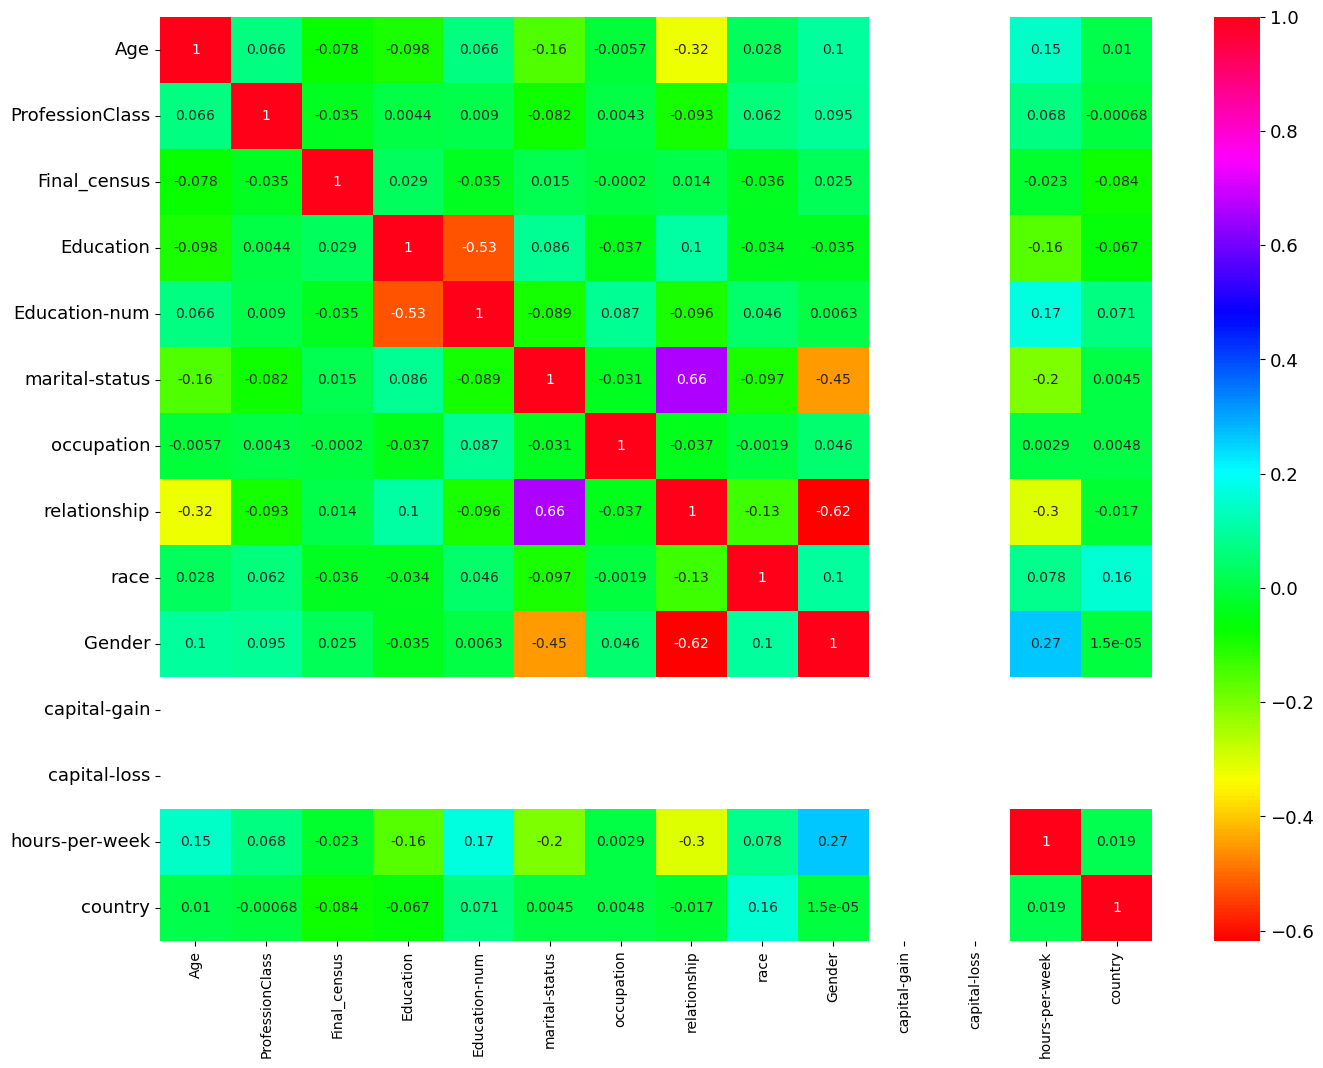

In [64]:
corr_matrix=X_scaled.corr(method='spearman')# use spearman for imballanced data
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix,annot=True,cmap='hsv')

#### Observation:
We dont have any multicollinearity

#### X_train, Y_test split 

In [65]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=100,stratify=Y)

In [66]:
df2['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [67]:
LR=LogisticRegression()

In [68]:
X_train.shape

(26048, 14)

In [69]:
Y_train.value_counts()

0    19775
1     6273
Name: income, dtype: int64

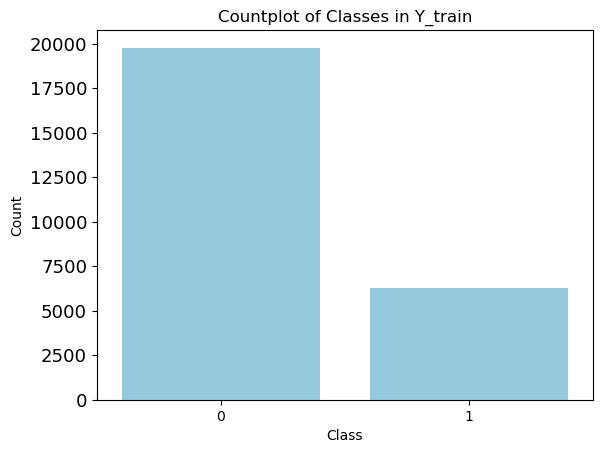

In [70]:
# target variable
sns.countplot(x=Y_train,color='skyblue')
plt.title('Countplot of Classes in Y_train')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [71]:
# Logistic regression .. to train the model
LR.fit(X_train,Y_train)

LogisticRegression()

In [72]:
# check the training performance
Y_train_predict=LR.predict(X_train)


In [73]:
accuracy_score(Y_train,Y_train_predict)

0.8232493857493858

In [74]:
LR.score(X_train,Y_train)

0.8232493857493858

In [75]:
confusion_matrix(Y_train,Y_train_predict)

array([[18308,  1467],
       [ 3137,  3136]])

In [76]:
print(classification_report(Y_train,Y_train_predict))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     19775
           1       0.68      0.50      0.58      6273

    accuracy                           0.82     26048
   macro avg       0.77      0.71      0.73     26048
weighted avg       0.81      0.82      0.81     26048



In [77]:
# check for the test data
Y_predict_test=LR.predict(X_test)

In [78]:
accuracy_score(Y_test,Y_predict_test)

0.8182097343773991

In [79]:
confusion_matrix(Y_test,Y_predict_test)

array([[4532,  413],
       [ 771,  797]])

In [80]:
print(classification_report(Y_test,Y_predict_test))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88      4945
           1       0.66      0.51      0.57      1568

    accuracy                           0.82      6513
   macro avg       0.76      0.71      0.73      6513
weighted avg       0.81      0.82      0.81      6513



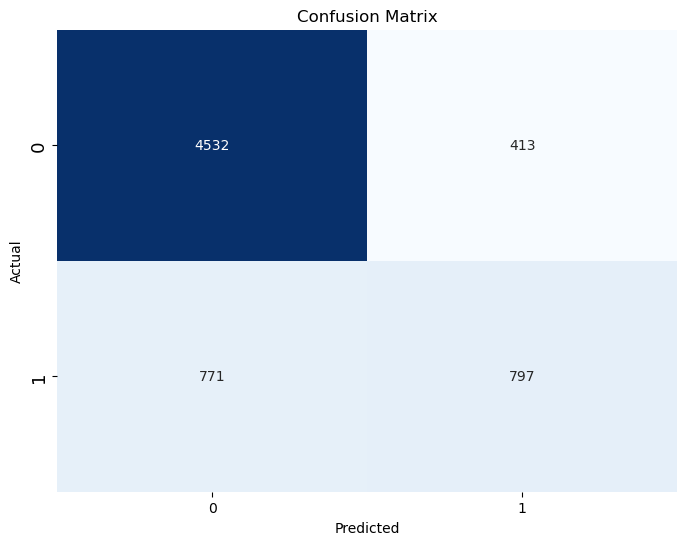

In [81]:

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_predict_test)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



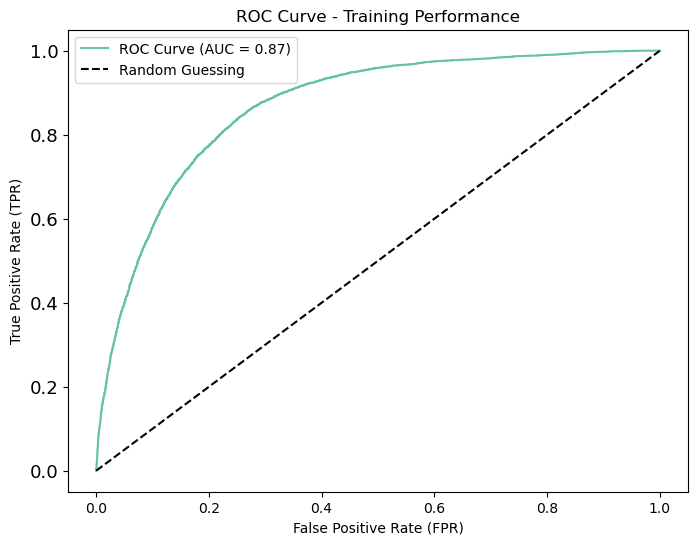

In [82]:
# Get predicted probabilities for the positive class (class 1)
Y_train_probs = LR.predict_proba(X_train)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_train, Y_train_probs)

# Calculate ROC AUC score
roc_auc = roc_auc_score(Y_train, Y_train_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve - Training Performance')
plt.legend()
plt.show()


## Implement models: KNN,SVM,GaussianNB,DecisionTree,RF,Bagging

In [83]:
KNN=KNeighborsClassifier()
support=SVC()
gnb=GaussianNB()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
bg=BaggingClassifier()

In [84]:
for model in[KNN,support,gnb,dt,rf,bg]:
    print("=========="*6)
    print("performance of", model)
    print("=========="*6)
    abc=model.fit(X_train,Y_train)
    y_pred_train=abc.predict(X_train)
    y_pred_test=abc.predict(X_test)
    AS_train=accuracy_score(Y_train,y_pred_train)
    AS_test=accuracy_score(Y_test,y_pred_test)
    cm=confusion_matrix(Y_test,y_pred_test)
    CR=classification_report(Y_test,y_pred_test)
    #ROC=roc_auc_score(Y_test1,y_pred)# its a probability method
    
    # printing the metrics
    
    print("training Accuracy score \n" ,AS_train)
    print("=========="*3)
    print("testing Accuracy score \n" ,AS_test)
    print("=========="*3)
    print("Confusion matrix \n" ,cm)
    print("=========="*3)
    print("CLASSIFICATION REPORT \n" ,CR)
    print("=========="*3)
    #print("ROC AUC \n" ,ROC)
    print("=========="*3)

performance of KNeighborsClassifier()


/Users/renaabbasova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/renaabbasova/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

training Accuracy score 
 0.8700092137592138
testing Accuracy score 
 0.8152924919391985
Confusion matrix 
 [[4409  536]
 [ 667  901]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.87      0.89      0.88      4945
           1       0.63      0.57      0.60      1568

    accuracy                           0.82      6513
   macro avg       0.75      0.73      0.74      6513
weighted avg       0.81      0.82      0.81      6513

performance of SVC()
training Accuracy score 
 0.8250153562653563
testing Accuracy score 
 0.8214340549669891
Confusion matrix 
 [[4666  279]
 [ 884  684]]
CLASSIFICATION REPORT 
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      4945
           1       0.71      0.44      0.54      1568

    accuracy                           0.82      6513
   macro avg       0.78      0.69      0.71      6513
weighted avg       0.81      0.82      0.81      6513

perform

### Balancing the dataset approach
#### oversampling, undersampling, smote

In [85]:
over = RandomOverSampler()
under = RandomUnderSampler()
sm=SMOTEENN()

#### Oversampling approach

In [86]:

X_train_over, Y_train_over=over.fit_resample(X_train,Y_train)

In [87]:
X_train_over.shape

(39550, 14)

In [88]:
Y_train_over.value_counts()

0    19775
1    19775
Name: income, dtype: int64

#### Undersampling approach

In [89]:
X_train_under,Y_train_under=under.fit_resample(X_train,Y_train)

In [90]:
X_train_under.shape

(12546, 14)

In [91]:
Y_train_under.value_counts()

0    6273
1    6273
Name: income, dtype: int64

#### SMOTE approach. Creating a synthetic dataset based on KNN principles.

In [99]:
X_train_smote,Y_train_smote=sm.fit_resample(X_train,Y_train)

In [100]:
X_train_smote.shape

(28726, 14)

In [101]:
Y_train_smote.value_counts()

1    15374
0    13352
Name: income, dtype: int64

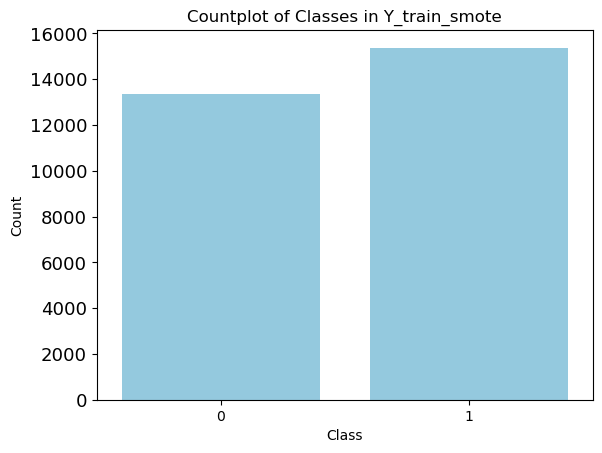

In [102]:
# target variable
sns.countplot(x=Y_train_smote,color='skyblue')
plt.title('Countplot of Classes in Y_train_smote')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()



#### Prediction after balancing data


#### Random Forest

In [103]:
rf.fit(X_train_over,Y_train_over)
Y_pred_over_RF=rf.predict(X_test)
print(classification_report(Y_test,Y_pred_over_RF))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      4945
           1       0.60      0.65      0.62      1568

    accuracy                           0.81      6513
   macro avg       0.74      0.76      0.75      6513
weighted avg       0.82      0.81      0.81      6513



In [104]:
rf.fit(X_train_smote,Y_train_smote)
Y_pred_smote_RF=rf.predict(X_test)
print(classification_report(Y_test,Y_pred_smote_RF))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      4945
           1       0.54      0.82      0.65      1568

    accuracy                           0.79      6513
   macro avg       0.74      0.80      0.75      6513
weighted avg       0.84      0.79      0.80      6513



In [105]:
rf.fit(X_train_under,Y_train_under)
Y_pred_under_RF=rf.predict(X_test)
print(classification_report(Y_test,Y_pred_under_RF))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      4945
           1       0.53      0.83      0.64      1568

    accuracy                           0.78      6513
   macro avg       0.73      0.79      0.74      6513
weighted avg       0.83      0.78      0.79      6513



#### Logistic Regression

In [106]:
LR.fit(X_train_under,Y_train_under)
Y_pred_under_LR=LR.predict(X_test)
print(classification_report(Y_test,Y_pred_under_LR))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      4945
           1       0.52      0.82      0.64      1568

    accuracy                           0.77      6513
   macro avg       0.72      0.79      0.74      6513
weighted avg       0.83      0.77      0.79      6513



In [107]:
LR.fit(X_train_over,Y_train_over)
Y_pred_over_LR=LR.predict(X_test)
print(classification_report(Y_test,Y_pred_over_LR))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84      4945
           1       0.52      0.82      0.63      1568

    accuracy                           0.77      6513
   macro avg       0.72      0.79      0.73      6513
weighted avg       0.83      0.77      0.79      6513



In [108]:
LR.fit(X_train_smote,Y_train_smote)
Y_pred_smote_LR=LR.predict(X_test)
print(classification_report(Y_test,Y_pred_smote_LR))

              precision    recall  f1-score   support

           0       0.94      0.70      0.80      4945
           1       0.48      0.87      0.62      1568

    accuracy                           0.74      6513
   macro avg       0.71      0.79      0.71      6513
weighted avg       0.83      0.74      0.76      6513



In [110]:
# Calculate and print the accuracy score
accuracy = accuracy_score(Y_test, Y_pred_smote_LR)
print(f'Accuracy Score: {accuracy}')

Accuracy Score: 0.7412866574543221


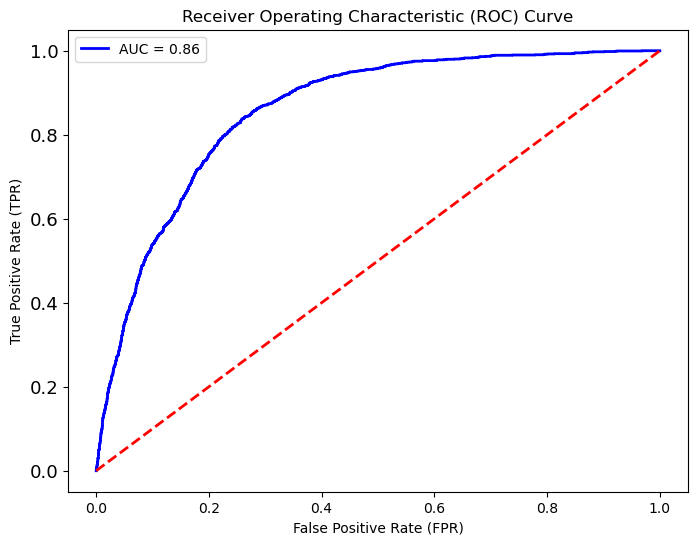

AUC Score: 0.86


In [111]:
# Predict probabilities of the positive class
Y_prob_smote_LR = LR.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob_smote_LR)

# Calculate AUC score
auc_score = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Print AUC score
print(f'AUC Score: {auc_score:.2f}')


# conclusion

The goal was to use this dataset to study logistic regression and apply other models to achieve better performance. However, after balancing the data, the model's performance did not improve; in fact, it gave worse results. The majority of the work involved cleaning, exploring, and transforming the data before applying the logistic regression model.

While the model performed reasonably well, there is room for improvement. We could explore enhancing its performance by modifying features, experimenting with different transformations of variables, and tuning hyperparameters using techniques like grid search, among others.